<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Data-Preprocessing/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mixed Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [ ]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengerrs traveling with')

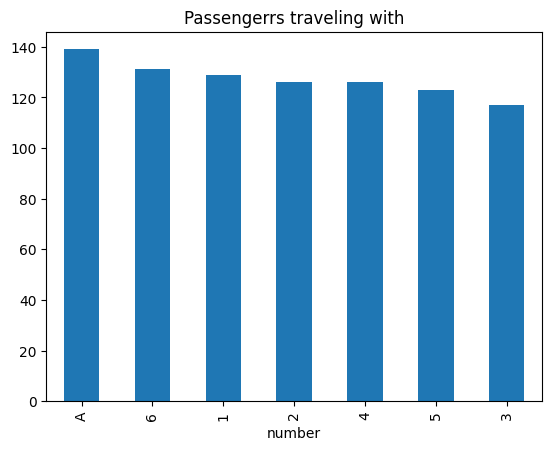

In [ ]:
fig=df['number'].value_counts().plot.bar()
fig.set_title("Passengerrs traveling with")

In [ ]:
# extract numerical part
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')


In [ ]:
#Extracct categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)') #captures numerical parts
df['cabin_cat']=df['Cabin'].str[0]  # capture categorical part
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

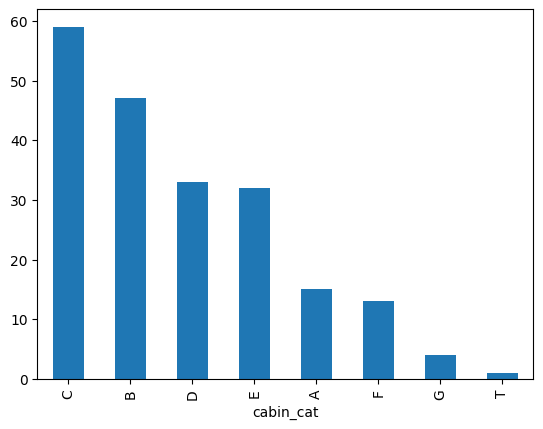

In [ ]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [ ]:
# extract the last bit of ticket as number
df['ticket_num']=df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num']=pd.to_numeric(df['ticket_num'],
                               errors='coerce',
                               downcast='integer')

# extract thee first part of the tickets as category
df['ticket_cat']=df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,
                          df['ticket_cat'])

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


##Date and Time Variable

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
date=pd.read_csv('/content/orders.csv')
time=pd.read_csv('/content/messages.csv')

In [ ]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [ ]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [ ]:
#whenever we import a data where any part of data relate to date so its bydefault a string datatype
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# ***Work with Dates***

In [ ]:
#Converting to datetime dataype
date['date']=(date['date']).dt.strftime()

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


##Extract year

In [ ]:
date['date_year']=date['date'].dt.year
date.head()

,date,product_id,city_id,orders,date_year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019


##Extract month

In [ ]:
date['date_month_no']=date['date'].dt.month
date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [ ]:
#month name
date['date_month_name']=date['date'].dt.month_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


##Extract Days

In [ ]:
date['date_day']=date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [ ]:
#day of week
date['date_dow']=date['date'].dt.dayofweek
date.head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


In [ ]:
# day of week name
date['date_dow_name']=date['date'].dt.day_name()
date.head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


In [ ]:
#Is weekend
date['date_is_weekend']=np.where(date['date_dow_name'].isin(['Sunday','Saturday']),1,0)
date.head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


##Extract quarter

In [ ]:
date['quarter']=date['date'].dt.quarter
date.head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter
0,2019-12-10,2019,12,December,10,1,Tuesday,0,1,4
1,2018-08-15,2018,8,August,15,2,Wednesday,0,2,3
2,2018-10-23,2018,10,October,23,1,Tuesday,0,1,4
3,2019-08-17,2019,8,August,17,5,Saturday,1,5,3
4,2019-01-06,2019,1,January,6,6,Sunday,1,6,1


##Extract time elapsed between dates

In [ ]:
import datetime
today=datetime.datetime.today()
today

datetime.datetime(2024, 7, 10, 16, 5, 9, 150418)

In [ ]:
today-date['date']

0     1674 days 16:05:09.150418
1     2156 days 16:05:09.150418
2     2087 days 16:05:09.150418
3     1789 days 16:05:09.150418
4     2012 days 16:05:09.150418
                 ...           
995   2102 days 16:05:09.150418
996   2043 days 16:05:09.150418
997   1891 days 16:05:09.150418
998   1956 days 16:05:09.150418
999   1730 days 16:05:09.150418
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
# finds days
(today-date['date']).dt.days

0      1674
1      2156
2      2087
3      1789
4      2012
       ... 
995    2102
996    2043
997    1891
998    1956
999    1730
Name: date, Length: 1000, dtype: int64

In [ ]:
#Months
np.round((today-date['date'])/np.timedelta64(1,'M'),0)

0      54.0
1      70.0
2      67.0
3      58.0
4      65.0
       ... 
995    68.0
996    66.0
997    61.0
998    63.0
999    56.0
Name: date, Length: 1000, dtype: float64

#***Work with time***

In [ ]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
#converting to datetime datatype
time['date']=pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [ ]:
time['hour']=time['date'].dt.hour
time['min']=time['date'].dt.minute
time['sec']=time['date'].dt.second
time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


##Extract time part

In [ ]:
time['time']=time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


##Time difference

In [ ]:
today-time['date']

0     3860 days 15:15:09.150418
1     3724 days 16:25:09.150418
2     4210 days 15:44:09.150418
3     3512 days 15:34:09.150418
4     3909 days 16:54:09.150418
                 ...           
995   4499 days 15:15:09.150418
996   3820 days 16:51:09.150418
997   4285 days 16:28:09.150418
998   4401 days 16:31:09.150418
999   3673 days 16:40:09.150418
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
#In sec
(today-time['date'])/np.timedelta64(1,'s')

0      3.335589e+08
1      3.218127e+08
2      3.638006e+08
3      3.034928e+08
4      3.377984e+08
           ...     
995    3.887685e+08
996    3.301087e+08
997    3.702833e+08
998    3.803059e+08
999    3.174072e+08
Name: date, Length: 1000, dtype: float64

In [ ]:
#In min
(today-time['date'])/np.timedelta64(1,'m')

0      5.559315e+06
1      5.363545e+06
2      6.063344e+06
3      5.058214e+06
4      5.629974e+06
           ...     
995    6.479475e+06
996    5.501811e+06
997    6.171388e+06
998    6.338431e+06
999    5.290120e+06
Name: date, Length: 1000, dtype: float64

In [ ]:
#In Hours
(today-time['date'])/np.timedelta64(1,'h')

0       92655.252542
1       89392.419208
2      101055.735875
3       84303.569208
4       93832.902542
           ...      
995    107991.252542
996     91696.852542
997    102856.469208
998    105640.519208
999     88168.669208
Name: date, Length: 1000, dtype: float64

#Missing Value

##Remove Value
**When data missing randomly**

In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data_science_job.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

In [ ]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
724,0.794,Full time course,Masters,15.0,33.0
1188,0.897,Full time course,Graduate,4.0,146.0
12095,0.855,no_enrollment,Graduate,8.0,101.0
10066,0.897,no_enrollment,Masters,16.0,80.0
3018,0.920,no_enrollment,Masters,20.0,30.0
